# MNIST Dataset

Load training data

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataFrame = pd.read_csv('C:/Git/Jupyter-Notebooks/MNIST/train.csv')

In [3]:
labels = dataFrame["label"]
data = dataFrame.drop("label", 1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

## Pixel data is now separate from the label

Now to visualize one of the data points

In [5]:
%matplotlib inline
import matplotlib.cm
import matplotlib.pyplot as plt

In [6]:
data = data.as_matrix()

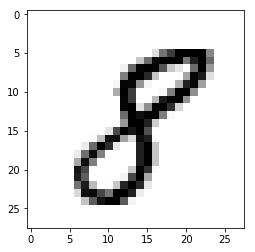

In [7]:
plt.imshow(data[30].reshape(28, 28), cmap=matplotlib.cm.binary)

In [8]:
labels[30]

8

## Training time

Using support vector classifier

In [9]:
from sklearn.svm import LinearSVC

In [10]:
model = LinearSVC()
model.fit(data, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

## Scoring

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

print "Model's accuracy: ", model.score(data, labels)
print "Cross validation scores: ", cross_val_score(model, data, labels)

Model's accuracy:  0.8961190476190476
Cross validation scores:  [0.85211368 0.85840834 0.82211745]


In [33]:
testFrame = pd.read_csv('C:/Git/Jupyter-Notebooks/MNIST/test.csv')

In [34]:
testData = testFrame.as_matrix()
testLabels = model.predict(testData)

In [36]:
with open('output.csv', 'w') as file:
    file.write('ImageId,Label\n')
    for i, label in enumerate(testLabels):
        file.write(str(i+1))
        file.write(',')
        file.write(str(label))
        file.write('\n')